In [229]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Global Measures

## Single Experiment

In [230]:
I = 30          # iterations
N_PEDS = 50     # percentage of pedestrians
N_CARS = 50     # percentage of cars
MODEL = "new"   # type of the model ('base' or 'new')

### Percentage of Evacuated

In [231]:
total_dfs = []
cars_dfs = []
peds_dfs = []

for i in range(1, I + 1):
    data = pd.read_csv(f"{base_folder}/evacuated/evacuated-{N_PEDS}-{N_CARS}-{i}.csv", skiprows=18)

    tot_evac = data[['x', 'y']].copy()
    tot_evac["i"] = i
    #tot_evac["cat"] = "evacuated"

    cars_evac = data[['x.1', 'y.1']].copy()
    cars_evac["i"] = i
    #cars_evac["cat"] = "cars"
    #cars_evac = cars_evac.rename(columns={'x.1':'x', 'y.1':'y'})

    peds_evac = data[['x.2', 'y.2']].copy()
    peds_evac["i"] = i
    #peds_evac["cat"] = "pedestrians"
    #peds_evac = peds_evac.rename(columns={'x.2':'x', 'y.2':'y'})

    # xx = pd.concat([tot_evac, cars_evac, peds_evac])

    #total_dfs.append(xx)

    total_dfs.append(tot_evac)
    cars_dfs.append(cars_evac)
    peds_dfs.append(peds_evac)

t_df = pd.concat(total_dfs).reset_index() # drop=True
c_df = pd.concat(cars_dfs).reset_index()
p_df = pd.concat(peds_dfs).reset_index()

KeyboardInterrupt: 

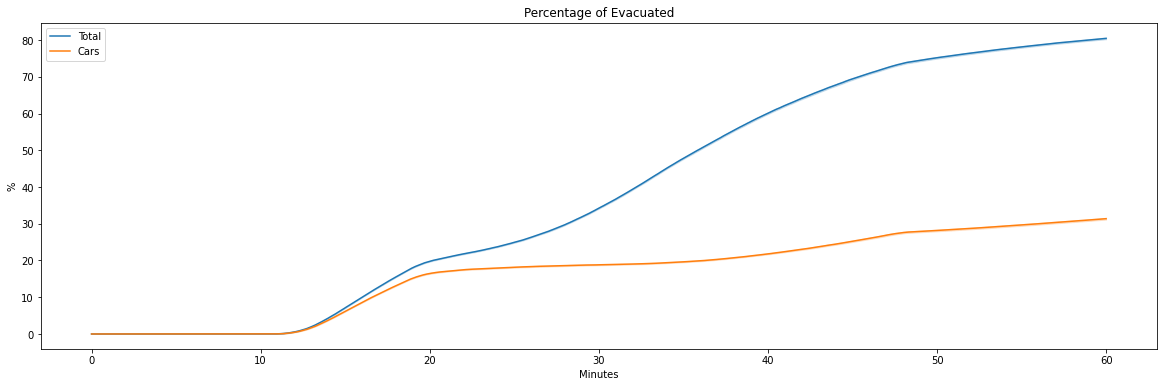

In [232]:
fig = plt.figure(figsize=(20, 6))
ax = sns.lineplot(x=t_df["x"], y=t_df["y"], label="Total") #  hue=t_df["cat"]
ax.set_title("Percentage of Evacuated")
ax.set_xlabel("Minutes")
ax.set_ylabel("%")
sns.lineplot(x=c_df["x.1"], y=c_df["y.1"], label="Cars")
sns.lineplot(x=p_df["x.2"], y=p_df["y.2"], label="Pedestrians")
fig.tight_layout()

### Casualties

In [ ]:
total_dfs = []
cars_dfs = []
peds_dfs = []

for i in range(1, I + 1):
    data = pd.read_csv(f"{base_folder}/casualties/casualties-{N_PEDS}-{N_CARS}-{i}.csv", skiprows=18)

    tot_evac = data[['x', 'y']].copy()
    tot_evac["i"] = i
    #tot_evac["cat"] = "evacuated"

    cars_evac = data[['x.1', 'y.1']].copy()
    cars_evac["i"] = i
    #cars_evac["cat"] = "cars"
    #cars_evac = cars_evac.rename(columns={'x.1':'x', 'y.1':'y'})

    peds_evac = data[['x.2', 'y.2']].copy()
    peds_evac["i"] = i
    #peds_evac["cat"] = "pedestrians"
    #peds_evac = peds_evac.rename(columns={'x.2':'x', 'y.2':'y'})

    # xx = pd.concat([tot_evac, cars_evac, peds_evac])

    #total_dfs.append(xx)

    total_dfs.append(tot_evac)
    cars_dfs.append(cars_evac)
    peds_dfs.append(peds_evac)

t_df = pd.concat(total_dfs).reset_index() # drop=True
c_df = pd.concat(cars_dfs).reset_index()
p_df = pd.concat(peds_dfs).reset_index()

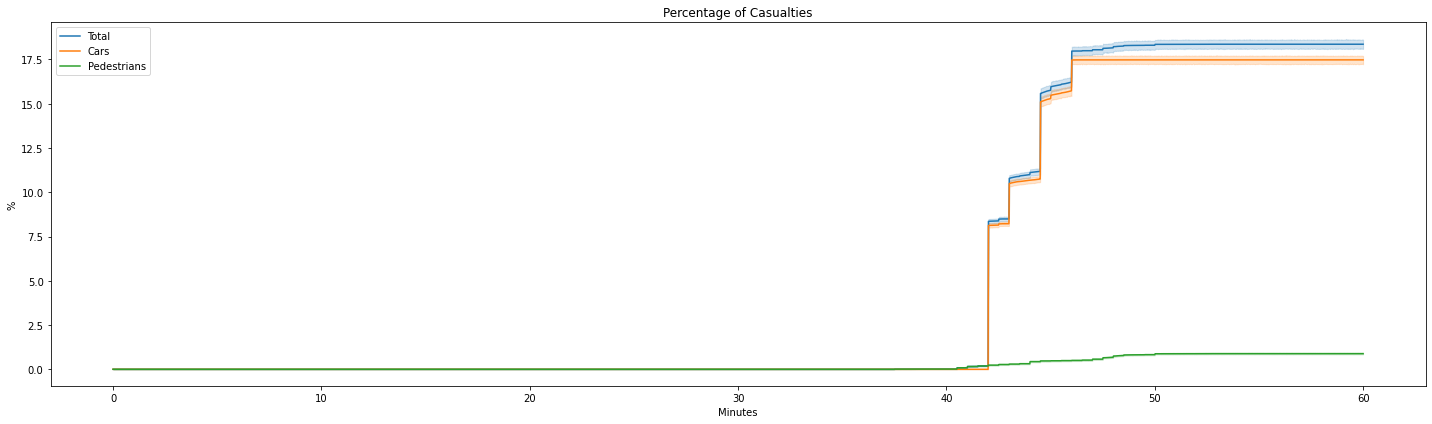

In [ ]:
fig = plt.figure(figsize=(20, 6))
ax = sns.lineplot(x=t_df["x"], y=t_df["y"], label="Total") #  hue=t_df["cat"]
ax.set_title("Percentage of Casualties")
ax.set_xlabel("Minutes")
ax.set_ylabel("%")
sns.lineplot(x=c_df["x.1"], y=c_df["y.1"], label="Cars")
sns.lineplot(x=p_df["x.2"], y=p_df["y.2"], label="Pedestrians")
fig.tight_layout()

### Evacuation Times

In [ ]:
# averaged times
df = pd.DataFrame({"y" : [0] * 60}, index=range(1, 61))

for i in range(1, I + 1):
    data = pd.read_csv(f"{base_folder}/times/times-{N_PEDS}-{N_CARS}-{i}.csv", skiprows=18)
    data = data[['x', 'y']].set_index("x")
    data = data.reindex(range(1, 61), fill_value=0)
    df = df + data

df = df / I
df = df.reset_index()
df.columns = ["x", "y"]

In [ ]:
# confidence interval
df = []
for i in range(1, I + 1):
    data = pd.read_csv(f"{base_folder}/times/times-{N_PEDS}-{N_CARS}-{i}.csv", skiprows=18)
    data = data[['x', 'y']].set_index("x")
    data['i'] = i
    data = data.reindex(range(1, 61), fill_value=0)
    df.append(data)
    
df = pd.concat(df).reset_index()

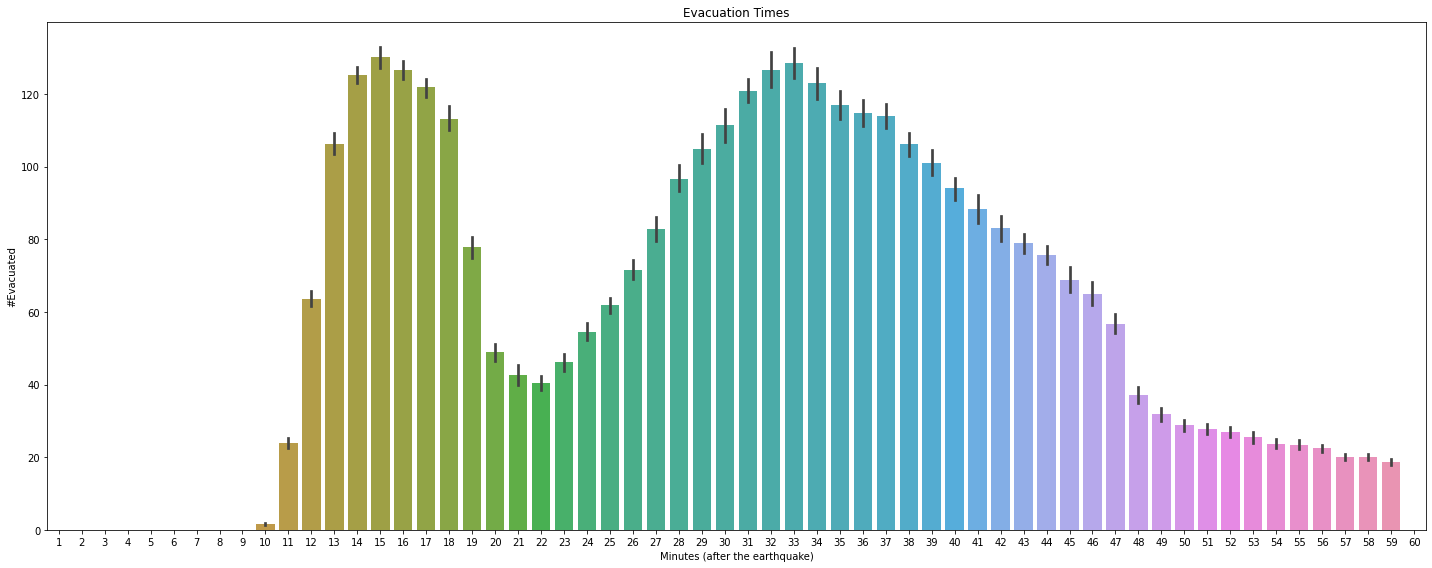

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = sns.barplot(x=df['x'], y=df['y'])
ax.set_title("Evacuation Times")
ax.set_xlabel("Minutes (after the earthquake)")
ax.set_ylabel("#Evacuated")
fig.tight_layout()

## Comparisons

In [282]:
I = 30          # iterations
MODEL = "new"  # type of the model ('base' or 'new')

base_folder = f"./data/{MODEL}"

exps = [
    #{ "N_PEDS": 0, "N_CARS": 100 },
    { "N_PEDS": 25, "N_CARS": 75 },
    { "N_PEDS": 50, "N_CARS": 50 },
    { "N_PEDS": 75, "N_CARS": 25 },
    { "N_PEDS": 100, "N_CARS": 0 },
]

In [288]:
def plot_comparisons(measure, normalize=True):
    fig, axes = plt.subplots(1, 2, figsize=(20, 4), sharey=True, sharex=True)
    axes = axes.flatten()

    axes[0].set_title(f"Cars")
    axes[0].set_xlabel("Minutes")
    axes[0].set_ylabel(f"% {measure.capitalize()}")

    axes[1].set_title(f"Pedestrians")
    axes[1].set_xlabel("Minutes")
    axes[1].set_ylabel(f"% {measure.capitalize()}")

    for i, exp in enumerate(exps):
        avg_data = pd.DataFrame()
        for k in range(1, I + 1):
            data = pd.read_csv(f"{base_folder}/{measure}/{measure}-{exp['N_PEDS']}-{exp['N_CARS']}-{k}.csv", skiprows=18)
            data["i"] = k

            avg_data = pd.concat((data, avg_data))
        
        car_avg_data = avg_data[["x.1", "y.1"]]
        ped_avg_data = avg_data[["x.2", "y.2"]]

        car_groups = car_avg_data.groupby(car_avg_data.index)
        ped_groups = ped_avg_data.groupby(ped_avg_data.index)

        cars_avg_data = car_groups[["x.1", "y.1"]].mean()
        peds_avg_data = ped_groups[["x.2", "y.2"]].mean()
        
       
        if normalize:
            cars_avg_data["y.1"] = cars_avg_data["y.1"] / (exp['N_CARS'] / 100)
            peds_avg_data["y.2"] = peds_avg_data["y.2"] / (exp['N_PEDS'] / 100)

        lbl = f"Pedestrians: {exp['N_PEDS']}%, Cars: {exp['N_CARS']}%"
        
        if exp['N_CARS'] != 0:
            sns.lineplot(x=cars_avg_data["x.1"], y=cars_avg_data["y.1"], ax=axes[0], label=lbl)
            
        if exp['N_PEDS'] != 0:
            sns.lineplot(x=peds_avg_data["x.2"], y=peds_avg_data["y.2"], ax=axes[1], label=lbl)

    fig.tight_layout()

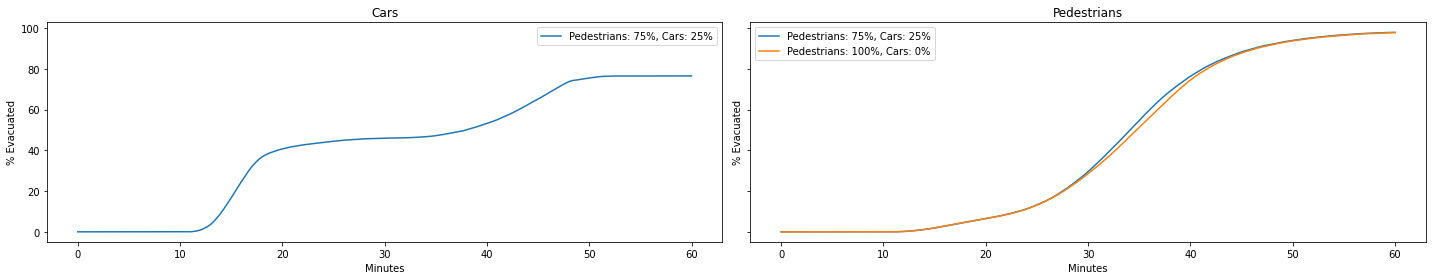

In [289]:
plot_comparisons("evacuated")

KeyError: 'y'

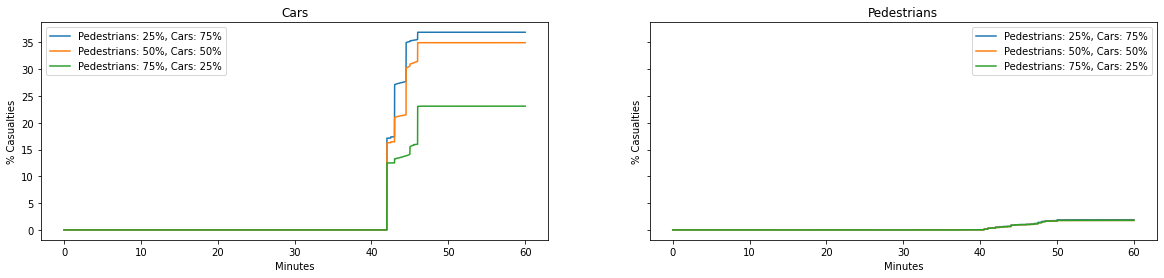

In [236]:
plot_comparisons("casualties")

In [ ]:
def plot_evacuation_times():
    fig, ax = plt.subplots(len(exps), 1, figsize=(20, 10), sharex=True, sharey=True)
    ax = ax.flatten()

    for i, exp in enumerate(exps):
        
        avg_data = None
        for k in range(1, I + 1):
            data = pd.read_csv(f"{base_folder}/times/times-{exp['N_PEDS']}-{exp['N_CARS']}-{k}.csv", skiprows=18)
            data = data[['x', 'y']].set_index("x")
            data = data.reindex(range(1, 61), fill_value=0)
            data = data.reset_index()
            
            if avg_data is None:
                avg_data = data
            else:
                avg_data = pd.concat((avg_data, data))

        groups = avg_data.groupby(avg_data.index)
        avg_evtimes_data = groups[["x", "y"]].mean()

        lbl = f"Pedestrians: {exp['N_PEDS']}%, Cars: {exp['N_CARS']}%"
        
        avg_evtimes_data["x"] = avg_evtimes_data["x"].astype(np.uint8)
        sns.barplot(x=avg_evtimes_data["x"], y=avg_evtimes_data["y"], ax=ax[i],)
        ax[i].set_title(lbl)
        ax[i].set_xlabel("Minutes (after the earthquake)")
        ax[i].set_ylabel("# Evacuated")

    fig.tight_layout()

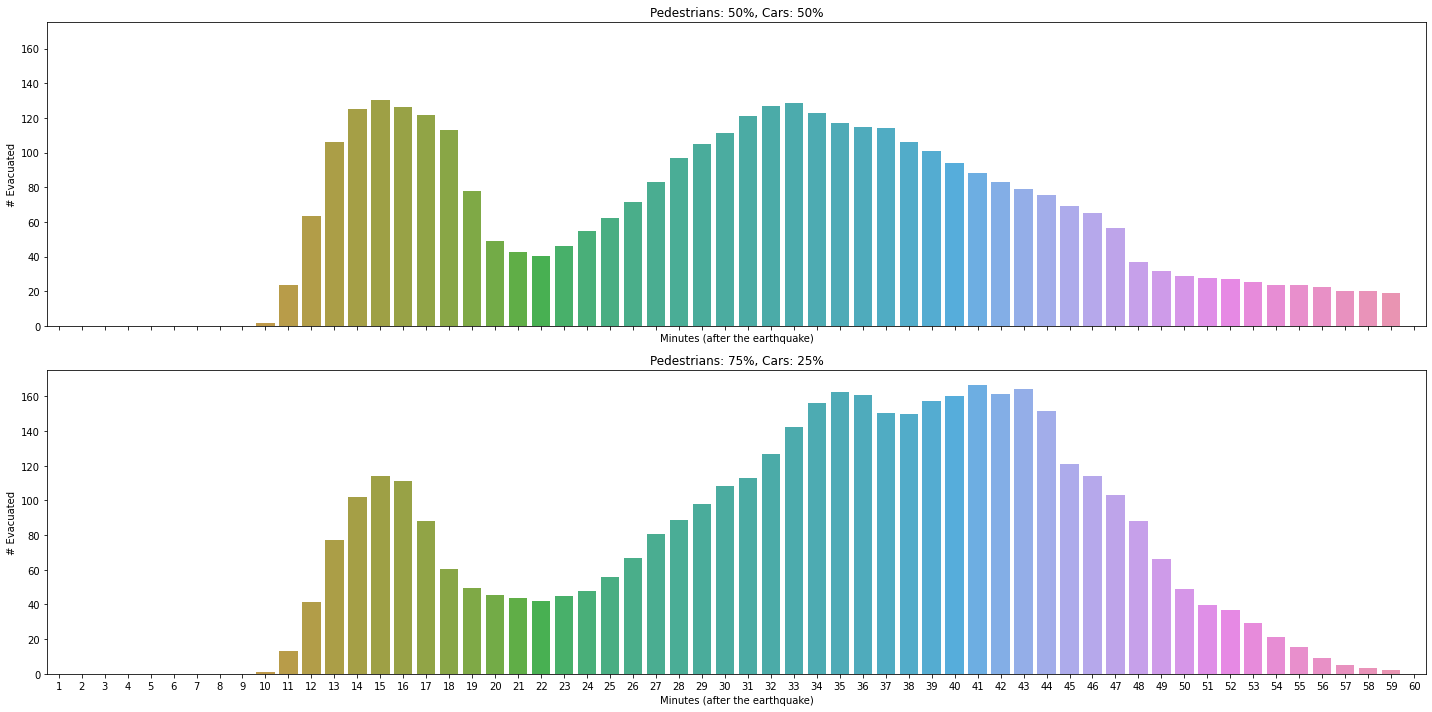

In [ ]:
plot_evacuation_times()

In [ ]:
def plot_comparisons(normalize=True):    
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
    axes = axes.flatten()

    axes[0].set_xlabel("Minutes")
    axes[0].set_ylabel("% Cars")

    axes[1].set_xlabel("Minutes")
    axes[1].set_ylabel("% Pedestrians")

    axes[2].set_xlabel("Minutes")
    axes[2].set_ylabel("% Total")

    cars_data = pd.DataFrame()
    peds_data = pd.DataFrame()
    tot_data = pd.DataFrame()

    for i, exp in enumerate(exps):
        avg_data = pd.DataFrame()
        for k in range(1, I + 1):
            e_data = pd.read_csv(f"{base_folder}/evacuated/evacuated-{exp['N_PEDS']}-{exp['N_CARS']}-{k}.csv", skiprows=18)
            c_data = pd.read_csv(f"{base_folder}/casualties/casualties-{exp['N_PEDS']}-{exp['N_CARS']}-{k}.csv", skiprows=18)
            
            e_data["measure"] = "evacuated"
            c_data["measure"] = "casualties"

            data = pd.concat((e_data, c_data))
            data["i"] = k

            avg_data = pd.concat((data, avg_data))

        e_groups = avg_data[avg_data["measure"] == "evacuated"]
        e_groups = e_groups.groupby([e_groups.index])

        e_tot_avg_data = e_groups[["x", "y"]].mean()
        e_cars_avg_data = e_groups[["x.1", "y.1"]].mean()
        e_peds_avg_data = e_groups[["x.2", "y.2"]].mean()

        c_groups = avg_data[avg_data["measure"] == "casualties"]
        c_groups = c_groups.groupby([c_groups.index])

        c_tot_avg_data = c_groups[["x", "y"]].mean()
        c_cars_avg_data = c_groups[["x.1", "y.1"]].mean()
        c_peds_avg_data = c_groups[["x.2", "y.2"]].mean()

        e_tot_avg_data["measure"] = "evacuated"
        e_cars_avg_data["measure"] = "evacuated"
        e_peds_avg_data["measure"] = "evacuated"

        c_tot_avg_data["measure"] = "casualties"
        c_cars_avg_data["measure"] = "casualties"
        c_peds_avg_data["measure"] = "casualties"

        tot_avg_data = pd.concat((e_tot_avg_data, c_tot_avg_data))
        cars_avg_data = pd.concat((e_cars_avg_data, c_cars_avg_data))
        peds_avg_data = pd.concat((e_peds_avg_data, c_peds_avg_data))
        
        if normalize:
            cars_avg_data["y.1"] = cars_avg_data["y.1"] / (exp['N_CARS'] / 100)
            peds_avg_data["y.2"] = peds_avg_data["y.2"] / (exp['N_PEDS'] / 100)

        cars_avg_data["experiment"] = f"Esperimento {i}"
        peds_avg_data["experiment"] = f"Esperimento {i}"
        tot_avg_data["experiment"] = f"Esperimento {i}"

        cars_data = pd.concat((cars_avg_data, cars_data))
        peds_data = pd.concat((peds_avg_data, peds_data))
        tot_data = pd.concat((tot_avg_data, tot_data))
        
    sns.lineplot(x=cars_data["x.1"], y=cars_data["y.1"], hue=cars_data["measure"], ax=axes[0], style=cars_data["experiment"])
    sns.lineplot(x=peds_data["x.2"], y=peds_data["y.2"], hue=peds_data["measure"], ax=axes[1], style=peds_data["experiment"])
    sns.lineplot(x=tot_data["x"], y=tot_data["y"], hue=tot_data["measure"], ax=axes[2], style=tot_data["experiment"])

    fig.tight_layout()

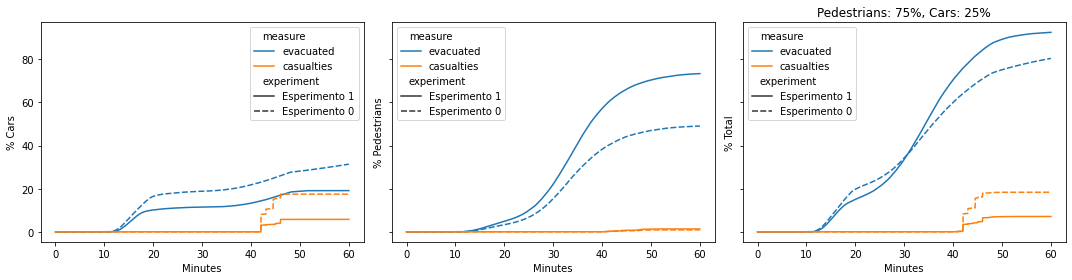

In [ ]:
plot_comparisons(normalize=False)

# Network Measures

## Average Values

In [ ]:
import re

LIST_RE = re.compile(r"\[(\d+) (\d+(?:\.\d+)?)\]")


def parse_list(netlogo_list):
    x = LIST_RE.findall(netlogo_list)
    x = dict(map(list, x))

    return x


def to_netlogo(value):
    return "[" + " ".join([f"[{k} {v}]" for (k, v) in value.items()]) + "]" 


def average_netlogo_lists(lists):
    lists = list(map(parse_list, lists))
    
    # append values of the same intersection
    new_dict = {}
    for n in lists:
        for (key, value) in n.items():
            if key not in new_dict:
                new_dict[key] = []

            new_dict[key].append(float(value))

    # pad values if missing and replace values with the mean
    for (key, value) in new_dict.items():
        new_dict[key] = np.mean((np.pad(value, (0, I - len(value)))))

    return to_netlogo(new_dict)

In [ ]:
prefix = f"{base_folder}/intersections/intersections-{N_PEDS}-{N_CARS}"

ints_df = None
for i in range (1, I + 1):
    data = pd.read_csv(f"{prefix}-{i}.csv")
    data = data.set_index(["who", "minute"])

    ints_df = pd.concat((ints_df, data))

grouped_ints_df = ints_df.groupby(level=[0, 1])

# average values 

avg_ints_df = pd.DataFrame(grouped_ints_df["car-delay"].mean())

for col in set(ints_df.columns) - set(["car-delay"]):
    avg_list = grouped_ints_df[col].apply(lambda x: average_netlogo_lists(x))
    avg_ints_df = avg_ints_df.join(avg_list)

avg_ints_df.to_csv(f"{prefix}-mean.csv")

In [ ]:
prefix = f"{base_folder}/intersections/intersections-evtimes-{N_PEDS}-{N_CARS}"

ints_evtime_df = None
for i in range (1, I + 1):
    data = pd.read_csv(f"{prefix}-{i}.csv")
    data = data.set_index(["who"])

    ints_evtime_df = pd.concat((ints_evtime_df, data))

ints_evtime_df = ints_evtime_df.groupby(level=[0]).mean()
ints_evtime_df.to_csv(f"{prefix}-mean.csv")

In [ ]:
prefix = f"{base_folder}/roads/roads-{N_PEDS}-{N_CARS}"

roads_df = None
for i in range (1, I + 1):
    data = pd.read_csv(f"{prefix}-{i}.csv")
    data = data.set_index(["end1", "end2", "minute"])

    roads_df = pd.concat((roads_df, data))

roads_df = roads_df.groupby(level=[0, 1, 2]).mean()

roads_df.to_csv(f"{prefix}-mean.csv")

## Roads

### Casualties

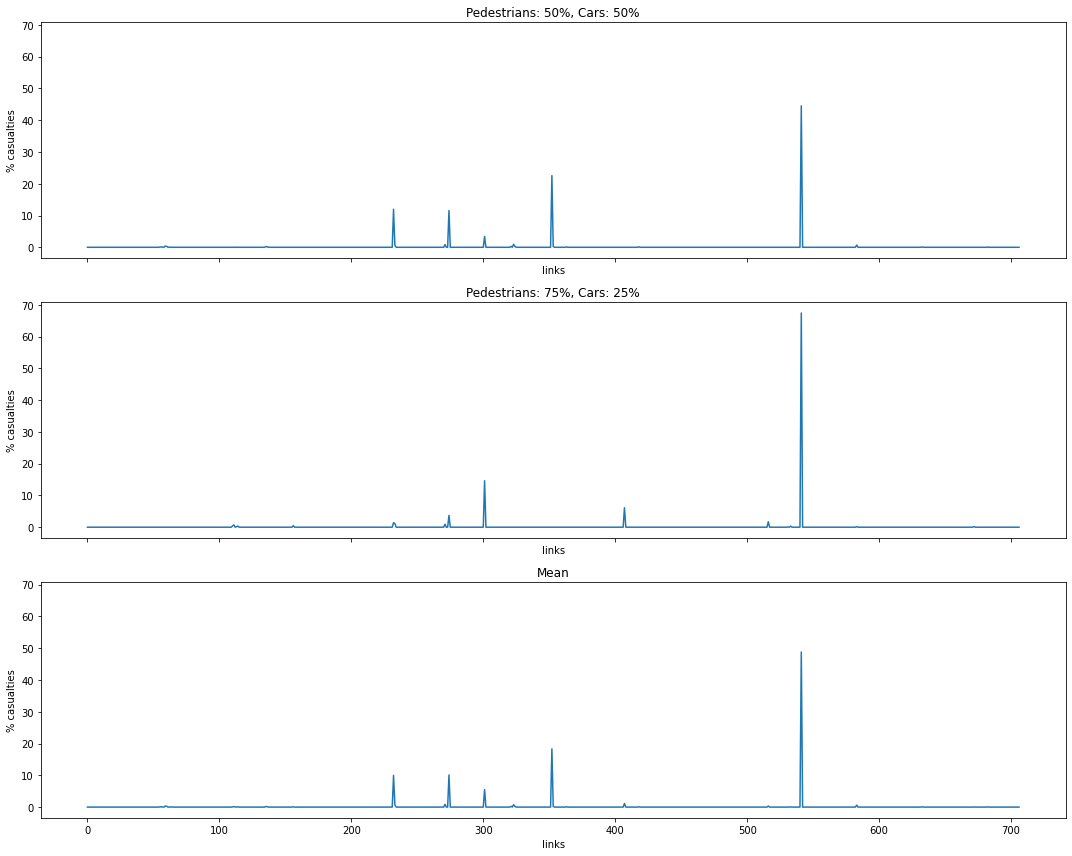

In [ ]:
fig, ax = plt.subplots(len(exps) + 1, 1, figsize=(15, 12), sharex=True, sharey=True)

avg_casualties = []
for i in range(len(exps) + 1):
    if i < len(exps):
        exp = exps[i]
        data = pd.read_csv(f"{base_folder}/roads/roads-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv")

        ints1 = set(data["end1"]) 
        ints2 = set(data["end2"])

        data = data.set_index(["end1", "end2"])
        data = data.loc[data["minute"] == 60]

        for x in ints1:
            for y in ints2:   
                if (x, y) in data.index and (y, x) in data.index:
                    data.loc[(x, y)] = data.loc[(x, y)] + data.loc[(y, x)]
                    data.drop((y, x), inplace=True)

        data = data.reset_index()

        casualties = data["casualties"]
        avg_casualties.append(casualties)

        ax[i].set_title(f"Pedestrians: {exp['N_PEDS']}%, Cars: {exp['N_CARS']}%")
    else:
        casualties = np.mean(avg_casualties, axis=0)
        ax[i].set_title(f"Mean")

    ax[i].set_ylabel("% casualties")
    ax[i].set_xlabel("links")
    sns.lineplot(casualties / np.sum(casualties) * 100, ax=ax[i])

fig.tight_layout()

## Intersections

In [ ]:
data = pd.read_csv(f"{base_folder}/intersections/intersections-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv")
data

,who,minute,car-delay,car-in-flow,p-in-flow,car-out-flow,p-out-flow
0,23,20,1.440544,[[51 0.0] [24 0.024452662512621032] [52 0.0162...,[[24 0.008157446668592706] [19 0.0] [51 0.0] [...,[[51 0.0] [52 0.0] [24 0.0] [19 0.028103611976...,[[19 0.013013407942466911] [52 0.0] [51 0.0] [...
1,23,40,1.440544,[[52 0.016275214584396878] [19 0.0] [51 0.0] [...,[[19 0.0] [24 0.002675451590540995] [51 0.0] [...,[[24 0.0] [19 0.02810361197604331] [52 0.0] [5...,[[51 0.0] [19 0.00426785135270088] [24 0.0] [5...
2,23,60,1.440544,[[19 0.0] [52 0.016275214584396878] [51 0.0] [...,[[19 0.0] [24 0.0016001364667381057] [51 0.0]],[[19 0.02810361197604331] [24 0.0] [52 0.0] [5...,[[19 0.00255249241013761] [24 0.0] [51 0.0] [5...
3,25,20,0.021152,[[26 0.0] [476 0.06054595762171482] [158 0.0] ...,[[476 0.028469640947242754] [318 0.0] [26 0.0]...,[[26 0.0] [318 0.0] [158 0.06061074440521923] ...,[[476 0.0] [318 0.0] [158 0.040234939742284384...
4,25,40,0.021152,[[158 0.0] [476 0.06054595762171482] [318 0.0]...,[[318 0.0] [26 0.0] [476 0.009336081758258473]...,[[158 0.06061074440521923] [476 0.0] [26 0.0] ...,[[158 0.013307514158913044] [476 0.0] [26 0.0]...
...,...,...,...,...,...,...,...
289,495,40,2.501113,[[324 0.04408791972525348] [332 0.0] [494 0.05...,[[332 0.0] [494 0.006610345249173703] [324 0.0...,[[332 0.07980867933005023] [324 0.0] [494 0.0]...,[[494 0.0] [324 0.0] [332 0.015009744259303367...
290,495,60,2.501113,[[494 0.05095974055848353] [324 0.044087919725...,[[324 0.0030053597234293936] [494 0.0039533667...,[[324 0.0] [332 0.07980867933005023] [494 0.0]...,[[494 0.0] [324 0.0] [332 0.008976611544730223...
291,507,20,1.749726,[[34 0.0] [521 0.03025129411539729] [508 0.0] ...,[[34 0.0] [508 0.0] [521 0.00748999479111587] ...,[[508 0.03617651734183688] [124 0.0] [34 0.0] ...,[[124 0.0] [34 0.0] [508 0.012711175141791724]...
292,507,40,1.749726,[[124 0.015695764997651702] [34 0.0] [508 0.0]...,[[34 0.0] [124 0.0017583375918567845] [508 0.0...,[[521 0.0] [508 0.03617651734183688] [34 0.0] ...,[[508 0.004173277542709992] [521 0.0] [34 0.0]...


In [ ]:
data = pd.read_csv(f"{base_folder}/intersections/intersections-evtimes-{exp['N_PEDS']}-{exp['N_CARS']}-mean.csv")
data

,who,mean car evacuation time,mean ped evacuation time
0,0,517.433333,1905.533333
1,1,549.816667,2358.061111
2,2,789.002778,2245.788333
3,3,668.911111,2205.261111
4,4,142.933333,1317.333333
...,...,...,...
552,553,259.766667,1259.366667
553,554,0.000000,0.000000
554,555,528.544444,1538.372222
555,556,445.511111,1693.677778
